In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Seaborn color palette
cmap = sns.color_palette("Paired", 10)
sns.set_palette(cmap)

# Section 1, Questions C and D 

In [19]:
def make_plot(X, y, clf, title, filename):
    '''
    Plots the decision boundary of the classifier <clf> (assumed to have been fitted
    to X via clf.fit()) against the matrix of examples X with corresponding labels y.

    Uses <title> as the title of the plot, saving the plot to <filename>.

    Note that X is expected to be a 2D numpy array of shape (num_samples, num_dims).
    '''
    # Create a mesh of points at which to evaluate our classifier
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, vmin=-1, vmax=1)

    # Also plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.savefig(filename)
    plt.show()

In [20]:
dataset1 = pd.read_csv("supplementary_materials/data/problem1dataset1.txt", header=None)
dataset2 = pd.read_csv("supplementary_materials/data/problem1dataset2.txt", header=None)
dataset3 = pd.read_csv("supplementary_materials/data/problem1dataset3.txt", header=None)

## Question C

In [21]:
# Train Logistic Regression models (uses log loss)
lr1 = LogisticRegression()
lr1.fit(dataset1[[0, 1]], dataset1[2])

lr2 = LogisticRegression()
lr2.fit(dataset2[[0, 1]], dataset2[2])

lr3 = LogisticRegression()
lr3.fit(dataset3[[0, 1]], dataset3[2])

# Train SVM models (uses hinge loss)
svm1 = SVC(kernel='linear')
svm1.fit(dataset1[[0, 1]], dataset1[2])

svm2 = SVC(kernel='linear')
svm2.fit(dataset2[[0, 1]], dataset2[2])

svm3 = SVC(kernel='linear')
svm3.fit(dataset3[[0, 1]], dataset3[2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Make Plots

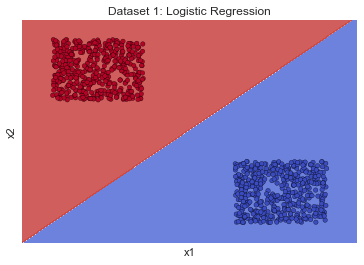

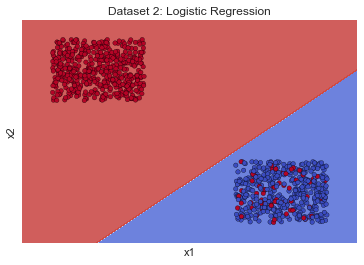

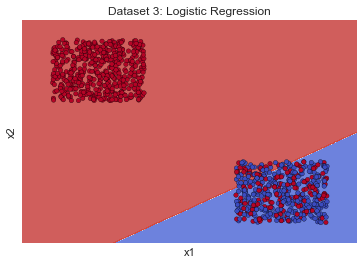

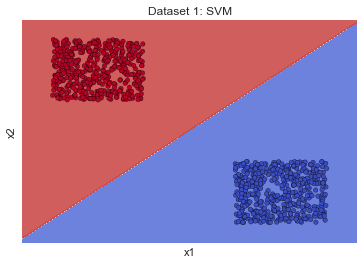

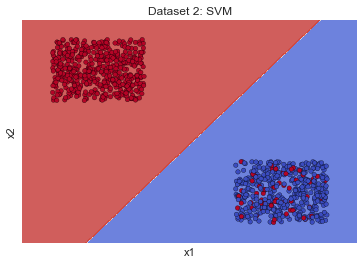

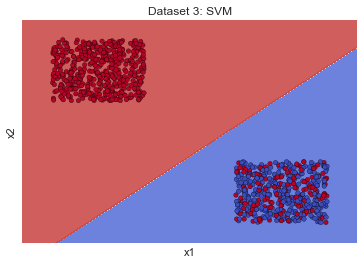

In [22]:
make_plot(np.array(dataset1[[0, 1]]), np.array(dataset1[2]), lr1, 'Dataset 1: Logistic Regression', 
          'lr1')
make_plot(np.array(dataset2[[0, 1]]), np.array(dataset2[2]), lr2, 'Dataset 2: Logistic Regression', 
          'lr2')
make_plot(np.array(dataset3[[0, 1]]), np.array(dataset3[2]), lr3, 'Dataset 3: Logistic Regression', 
          'lr3')
make_plot(np.array(dataset1[[0, 1]]), np.array(dataset1[2]), svm1, 'Dataset 1: SVM', 
          'svm1')
make_plot(np.array(dataset2[[0, 1]]), np.array(dataset2[2]), svm2, 'Dataset 2: SVM', 
          'svm2')
make_plot(np.array(dataset3[[0, 1]]), np.array(dataset3[2]), svm3, 'Dataset 3: SVM', 
          'svm3')

## Question D

In [23]:
# Train models
lr_weighted = LogisticRegression(class_weight={1: 5, -1: 1})
lr_weighted.fit(dataset2[[0, 1]], dataset2[2])

svm_weighted = SVC(kernel='linear', class_weight={1: 5, -1: 1})
svm_weighted.fit(dataset2[[0, 1]], dataset2[2])

SVC(C=1.0, cache_size=200, class_weight={1: 5, -1: 1}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Make Plots

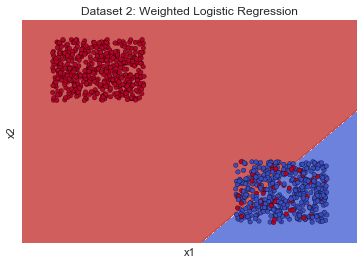

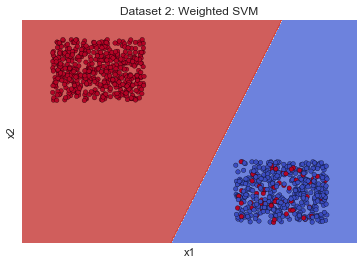

In [24]:
make_plot(np.array(dataset2[[0, 1]]), np.array(dataset2[2]), lr_weighted, "Dataset 2: Weighted Logistic Regression",
         "weighted_lr")
make_plot(np.array(dataset2[[0, 1]]), np.array(dataset2[2]), svm_weighted, "Dataset 2: Weighted SVM",
         "weighted_svm")

# Section 2: Implementation of l2 regularization

# Section 2, Question C

In [97]:
# Read in data
train1 = pd.read_csv("supplementary_materials/data/wine_training1.txt")
train2 = pd.read_csv("supplementary_materials/data/wine_training2.txt")
test1 = pd.read_csv("supplementary_materials/data/wine_testing.txt")
test2 = pd.read_csv("supplementary_materials/data/wine_testing.txt")

In [98]:
# Normalize
train1_mean = train1.ix[:, 1:].mean()
train2_mean = train2.ix[:, 1:].mean()
train1_std = train1.ix[:, 1:].std()
train2_std = train2.ix[:, 1:].std()
train1.ix[:, 1:] = (train1.ix[:, 1:] - train1_mean) / (train1_std)
train2.ix[:, 1:] = (train2.ix[:, 1:] - train2_mean) / (train2_std)
test1.ix[:, 1:] = (test1.ix[:, 1:] - train1_mean) / (train1_std)
test2.ix[:, 1:] = (test2.ix[:, 1:] - train2_mean) / (train2_std)

# Add bias column
train1.insert(1, 'x0', 1.0)
train2.insert(1, 'x0', 1.0)
test1.insert(1, 'x0', 1.0)
test2.insert(1, 'x0', 1.0)

In [99]:
def l2_logistic_grad(x, y, w, lam, N):
    return (2 * lam * w / N) - (y * x / (1 + np.exp(y * np.dot(w.T, x))))

def l2_logistic_error(X, Y, w, lam):
    assert len(X) == len(Y)
    error_sum = 0
    for i in range(len(X)):
        error_sum += l2_logistic_error_helper(X[i], Y[i], w, lam)
    return lam * np.dot(w.T, w) - error_sum

def l2_logistic_error_helper(x, y, w, lam):
    return np.log(1 / (1 + np.exp(-y * np.dot(w.T, x))))

In [100]:
def sgd(X, Y, reg_str, init_weights):
    assert len(X) == len(Y)
    weights = init_weights.copy()
    #print(weights)
    
    ### First epoch ###
    loss = l2_logistic_error(X, Y, weights, reg_str)
    
    for i in range(len(X)):
        update = l2_logistic_grad(X[i], Y[i], weights, reg_str, len(X))
        weights -= .01 * update
    new_loss = l2_logistic_error(X, Y, weights, reg_str)
    print('%f, %f' % (loss, new_loss))
    ep1_loss_red = 1 - new_loss / loss
    
    ### Other epochs ###
    loss_red = 1
    while loss_red > .00001 * ep1_loss_red:
        loss = new_loss
        for i in range(len(X)):
            update = l2_logistic_grad(X[i], Y[i], weights, reg_str, len(X))
            weights -= .01 * update
        new_loss = l2_logistic_error(X, Y, weights, reg_str)
        loss_red = 1 - new_loss / loss
    return weights

In [104]:
X1, X2, X1_test, X2_test = np.array(train1.ix[:, 1:]), np.array(train2.ix[:, 1:]), np.array(test1.ix[:, 1:]), np.array(test2.ix[:, 1:])
Y1, Y2, Y1_test, Y2_test = np.array(train1.ix[:, 0]), np.array(train2.ix[:, 0]), np.array(test1.ix[:, 0]), np.array(test2.ix[:, 0])

train1_weights = []
train2_weights = []

reg_strs = [0.0001]
for i in range(10):
    reg_strs.append(reg_strs[-1] * 5)
    
# Do SGD
for reg_str in reg_strs:
    print('****' + str(reg_str) + '****')
    init_weights = np.random.normal(0, .01, 14)
    train1_weights.append(sgd(X1, Y1, reg_str, init_weights))
    train2_weights.append(sgd(X2, Y2, reg_str, init_weights))

****0.0001****
68.333041, 31.469417
27.352132, 16.424405
****0.0005****
69.897398, 31.953039
27.995948, 16.728267
****0.0025****
70.700397, 31.992108
28.183315, 16.759641
****0.0125****
69.530565, 31.684414
27.613846, 16.510484
****0.0625****
71.072787, 32.135960
28.236869, 16.820873
****0.3125****
68.708227, 31.926702
27.236881, 16.480011
****1.5625****
70.104324, 32.820582
28.079070, 17.050153
****7.8125****
68.139281, 35.689140
27.191970, 17.794254
****39.0625****
70.151164, 46.521542
27.881661, 21.453064
****195.3125****
69.558454, 62.632749
28.115760, 26.065519
****976.5625****
70.259893, 69.334000
28.650039, 27.563378


In [105]:
def logistic_error(X, Y, w):
    assert len(X) == len(Y)
    error_sum = 0
    for i in range(len(X)):
        error_sum += logistic_error_helper(X[i], Y[i], w)
    return -1 * error_sum / len(X)

def logistic_error_helper(x, y, w):
    return np.log(1 / (1 + np.exp(-y * np.dot(w.T, x))))

train1_train_errs = []
train2_train_errs = []
train1_test_errs = []
train2_test_errs = []
train1_w_norms = []
train2_w_norms = []

for i in range(len(reg_strs)):
    w1 = train1_weights[i]
    w2 = train2_weights[i]
    
    train1_train_errs.append(logistic_error(X1, Y1, w1))
    train2_train_errs.append(logistic_error(X2, Y2, w2))
    
    train1_test_errs.append(logistic_error(X1_test, Y1_test, w1))
    train2_test_errs.append(logistic_error(X2_test, Y2_test, w2))
    
    train1_w_norms.append(np.dot(w1.T, w1))
    train2_w_norms.append(np.dot(w2.T, w2))

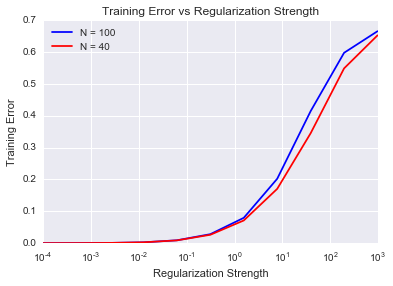

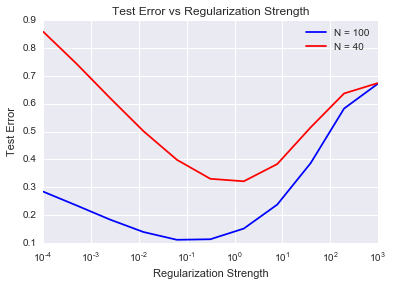

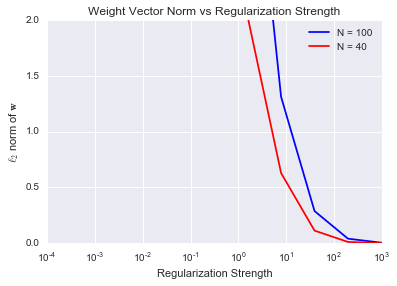

In [107]:
plt.plot(reg_strs, train1_train_errs, 'b-', label='N = 100')
plt.plot(reg_strs, train2_train_errs, 'r-', label='N = 40')
plt.xlabel('Regularization Strength')
plt.ylabel('Training Error')
plt.title('Training Error vs Regularization Strength')
plt.xscale('log')
plt.legend(loc='best')
plt.savefig("train_err_reg_str")
plt.show()

plt.plot(reg_strs, train1_test_errs, 'b-', label='N = 100')
plt.plot(reg_strs, train2_test_errs, 'r-', label='N = 40')
plt.xlabel('Regularization Strength')
plt.ylabel('Test Error')
plt.title('Test Error vs Regularization Strength')
plt.xscale('log')
plt.legend(loc='best')
plt.savefig("test_err_reg_str")
plt.show()

plt.plot(reg_strs, train1_w_norms, 'b-', label='N = 100')
plt.plot(reg_strs, train2_w_norms, 'r-', label='N = 40')
plt.xlabel('Regularization Strength')
plt.ylabel(r'$\ell_2$ norm of $\mathbf{w}$')
plt.title('Weight Vector Norm vs Regularization Strength')
plt.xscale('log')
plt.legend(loc='best')
axes = plt.gca()
axes.set_ylim([0, 2])
plt.savefig("weight_norms")
plt.show()

# Section 3, Question A

In [207]:
problem3data = pd.read_csv("supplementary_materials/data/problem3data.txt", header=None, 
                           delimiter='\t')
X = problem3data[[0,1,2,3,4,5,6,7,8]]
Y = problem3data[9]

In [208]:
reg_strs_lasso = np.arange(0, 1.8, 0.1)
reg_strs_ridge = np.arange(0, 5000, 50)
lasso_model_weights = []
ridge_model_weights = []

for alpha in reg_strs_lasso:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, Y)
    lasso_model_weights.append(lasso_model.coef_)
    
    
for alpha in reg_strs_ridge:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, Y)
    ridge_model_weights.append(ridge_model.coef_)
    

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


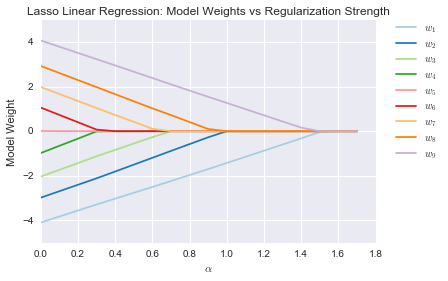

In [215]:
# Plot the lasso data
lasso_model_weights = np.vstack(lasso_model_weights)
plt.plot(reg_strs_lasso, np.array([lst[0] for lst in lasso_model_weights]), label='$w_1$')
plt.plot(reg_strs_lasso, np.array([lst[1] for lst in lasso_model_weights]), label='$w_2$')
plt.plot(reg_strs_lasso, np.array([lst[2] for lst in lasso_model_weights]), label='$w_3$')
plt.plot(reg_strs_lasso, np.array([lst[3] for lst in lasso_model_weights]), label='$w_4$')
plt.plot(reg_strs_lasso, np.array([lst[4] for lst in lasso_model_weights]), label='$w_5$')
plt.plot(reg_strs_lasso, np.array([lst[5] for lst in lasso_model_weights]), label='$w_6$')
plt.plot(reg_strs_lasso, np.array([lst[6] for lst in lasso_model_weights]), label='$w_7$')
plt.plot(reg_strs_lasso, np.array([lst[7] for lst in lasso_model_weights]), label='$w_8$')
plt.plot(reg_strs_lasso, np.array([lst[8] for lst in lasso_model_weights]), label='$w_9$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Lasso Linear Regression: Model Weights vs Regularization Strength")
plt.xlabel(r'$\alpha$')
plt.ylabel("Model Weight")
plt.savefig("lasso_weights")
plt.show()

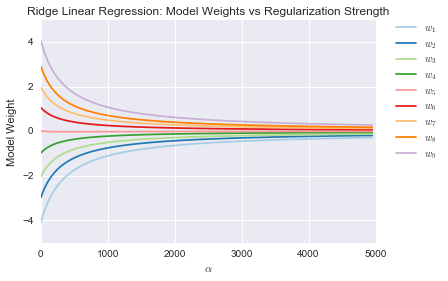

In [210]:
# Plot the ridge data
ridge_model_weights = np.vstack(ridge_model_weights)
plt.plot(reg_strs_ridge, np.array([lst[0] for lst in ridge_model_weights]), label='$w_1$')
plt.plot(reg_strs_ridge, np.array([lst[1] for lst in ridge_model_weights]), label='$w_2$')
plt.plot(reg_strs_ridge, np.array([lst[2] for lst in ridge_model_weights]), label='$w_3$')
plt.plot(reg_strs_ridge, np.array([lst[3] for lst in ridge_model_weights]), label='$w_4$')
plt.plot(reg_strs_ridge, np.array([lst[4] for lst in ridge_model_weights]), label='$w_5$')
plt.plot(reg_strs_ridge, np.array([lst[5] for lst in ridge_model_weights]), label='$w_6$')
plt.plot(reg_strs_ridge, np.array([lst[6] for lst in ridge_model_weights]), label='$w_7$')
plt.plot(reg_strs_ridge, np.array([lst[7] for lst in ridge_model_weights]), label='$w_8$')
plt.plot(reg_strs_ridge, np.array([lst[8] for lst in ridge_model_weights]), label='$w_9$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Ridge Linear Regression: Model Weights vs Regularization Strength")
plt.xlabel(r'$\alpha$')
plt.ylabel("Model Weight")
plt.savefig("ridge_weights")
plt.show()